<a href="https://colab.research.google.com/github/pmukeshreddy/hands-on-machine-leaning-book-projects/blob/main/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np


In [ ]:
pwd=os.getcwd()
filepath=os.path.join(pwd,"housing.csv")

In [ ]:
housing_data=pd.read_csv(filepath)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


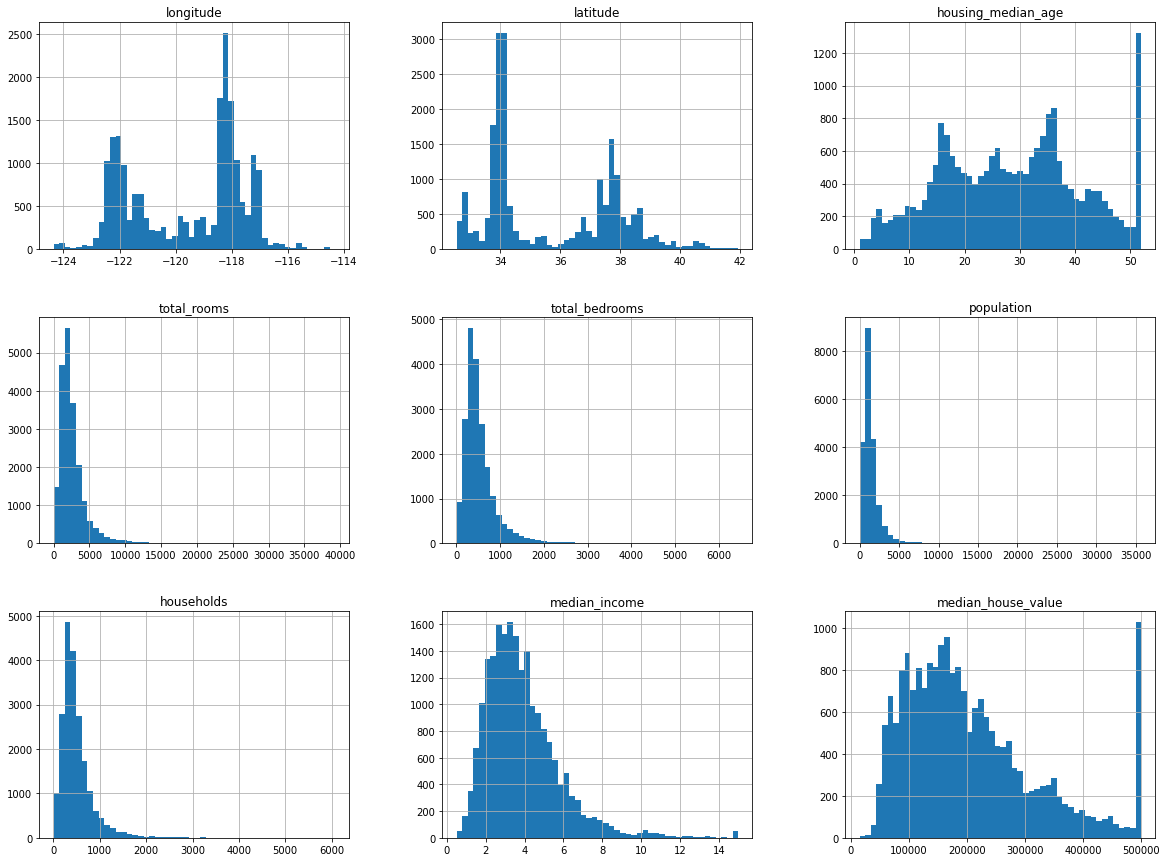

In [ ]:
import matplotlib.pyplot as plt
housing_data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
def spilt_train_test(data,ratio):
    shuffled_indices=np.random.permutation(data)
    testset_size=int(len(data)*ratio)
    test_set=shuffled_indices[0:testset_size]
    train_set=shuffled_indices[testset_size:]
    return test_set,train_set
te_s,tr_s=spilt_train_test(housing_data,0.2)
print((te_s))
print("hi")
print((tr_s))
print(len(housing_data))
    
    
    

[[-117.28 32.73 44.0 ... 4.8684 358600.0 'NEAR OCEAN']
 [-117.99 34.05 35.0 ... 3.7917 151100.0 '<1H OCEAN']
 [-117.91 33.91 27.0 ... 3.6106 196400.0 '<1H OCEAN']
 ...
 [-121.65 39.76 31.0 ... 3.0 96700.0 'INLAND']
 [-120.01 38.93 22.0 ... 2.996 126100.0 'INLAND']
 [-118.31 33.99 45.0 ... 2.2339 104800.0 '<1H OCEAN']]
hi
[[-120.58 35.0 37.0 ... 1.4726 106300.0 '<1H OCEAN']
 [-118.17 34.05 39.0 ... 3.375 126000.0 '<1H OCEAN']
 [-118.12 34.08 52.0 ... 5.3032 245700.0 '<1H OCEAN']
 ...
 [-122.21 37.79 35.0 ... 2.875 143800.0 'NEAR BAY']
 [-118.18 33.78 17.0 ... 2.0769 100000.0 'NEAR OCEAN']
 [-117.12 33.27 11.0 ... 4.9375 232800.0 '<1H OCEAN']]
20640


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_data,test_size=0.2,random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


<AxesSubplot:>

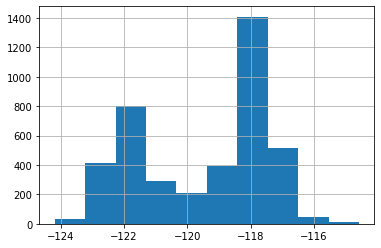

In [ ]:
test_set["longitude"].hist()


<AxesSubplot:>

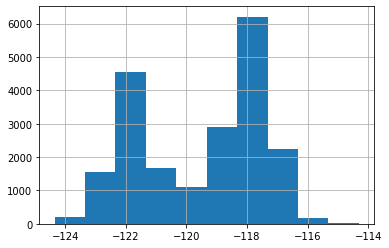

In [ ]:
housing_data["longitude"].hist()

<AxesSubplot:>

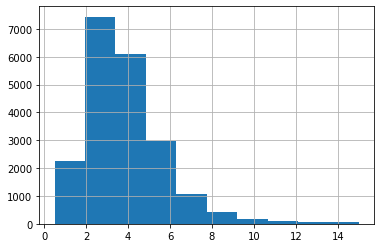

In [ ]:
housing_data["median_income"].hist()

<AxesSubplot:>

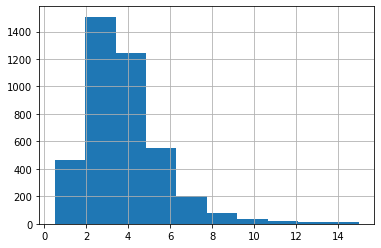

In [ ]:
test_set["median_income"].hist()

<AxesSubplot:>

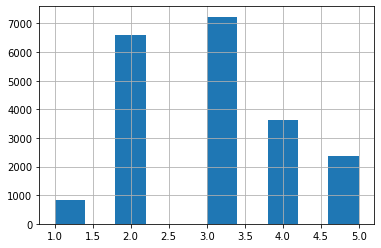

In [ ]:
housing_data["income_cat"]=pd.cut(housing_data["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing_data["income_cat"].hist()

stratified sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for s_train_set,s_test_set in split.split(housing_data,housing_data["income_cat"]):
    train_set_t=housing_data.loc[s_train_set]
    test_set_t=housing_data.loc[s_test_set]
    

In [ ]:
test_set_t["income_cat"].value_counts()/len(test_set_t)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
copy_housing=train_set_t.copy()

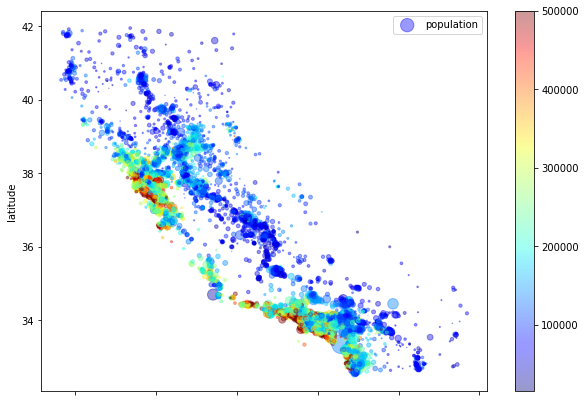

In [ ]:
copy_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=copy_housing["population"]/100, label="population", figsize=(10, 7), c=copy_housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


In [ ]:
corr_matrix=copy_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

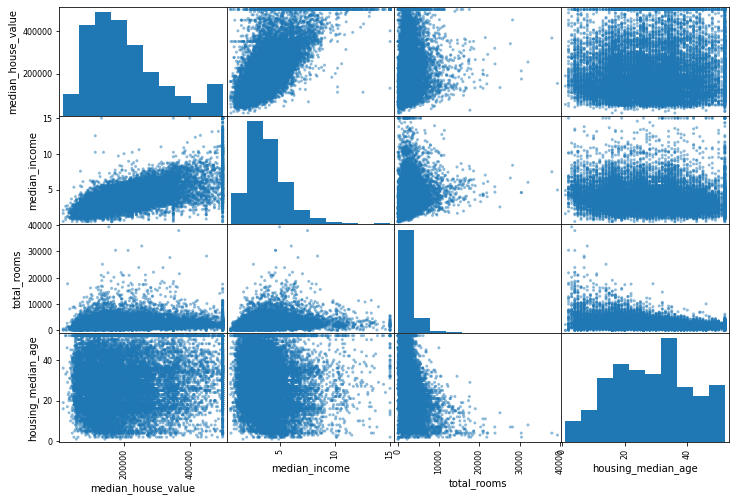

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age",]
scatter_matrix(copy_housing[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

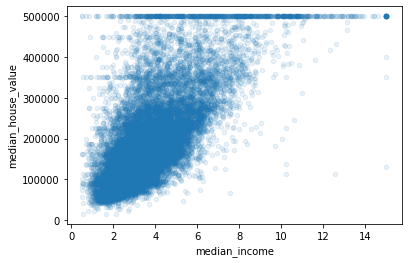

In [ ]:
copy_housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

experimenting with artibute combinations

In [ ]:
#copy_housing["no_of_rooms_in_hosehold"]=copy_housing["total_rooms"]/copy_housing["households"]
#copy_housing["bedrooms_per_house_hold"]=copy_housing["total_bedrooms"]/copy_housing["total_rooms"]
#copy_housing["population_per_household"]=copy_housing["population"]/copy_housing["households"]

In [ ]:
corr_matrix_1=copy_housing.corr()
corr_matrix_1["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

prepare data  for ml algorithms

In [ ]:
copy_housing=copy_housing.drop("median_house_value",axis=1)
housing_labels=train_set_t["median_house_value"].copy()


take care of missing values
we can take by
1> data.dropna(subset=housing["ss"])
2> data.drop(housing["ss"],axis=1)
3>median=housin["ss"].medaian()
 data.fillana(medain,inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=copy_housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [ ]:
X = imputer.transform(housing_num)
training_set_im=pd.DataFrame(X,columns=housing_num.columns)
training_set_im

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0


In [ ]:
housing_txt=copy_housing[["ocean_proximity"]]
housing_txt.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_e=OrdinalEncoder()
housing_txt_encoded=ordinal_e.fit_transform(housing_txt)
housing_txt_encoded[:10]
ordinal_e.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc=OneHotEncoder()
housing_txt_o_e=one_hot_enc.fit_transform(housing_txt)
housing_txt_o_e


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_txt_o_e.toarray()
one_hot_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
print(training_set_im.values[:,1])

[38.52 33.09 35.37 ... 38.44 38.31 39.97]


In [ ]:
print(training_set_im.values)


[[-121.46     38.52     29.     ...  706.        2.1736    2.    ]
 [-117.23     33.09      7.     ...  768.        6.3373    5.    ]
 [-119.04     35.37     44.     ...  300.        2.875     2.    ]
 ...
 [-122.72     38.44     48.     ...  172.        3.1797    3.    ]
 [-122.7      38.31     14.     ...  501.        4.1964    3.    ]
 [-122.14     39.97     27.     ...  197.        3.1319    3.    ]]


In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedroom_ix,population_ix,households_ix=3,4,5,6
class combinedartibuteadder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,Y=None):
        return self
    def transform(self,X,Y=None):
        rooms_per_houssehold=X[:,bedroom_ix]/X[:,households_ix]
        population_per_house_hold=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_houssehold,population_per_house_hold,bedroom_per_room]
        else:
            return np.c_[X, rooms_per_houssehold, population_per_house_hold]
            
        
        
        
        
             


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipe_line = Pipeline([("imputer",SimpleImputer(strategy="median")),
                          ("artibute_adder",combinedartibuteadder()),
                          ("std_scaler",StandardScaler())
                          ])
final_num=num_pipe_line.fit_transform(housing_num)

In [ ]:
cat_ar=pd.DataFrame(housing_data["ocean_proximity"])

In [ ]:
from sklearn.compose import ColumnTransformer
num_artibutes=list(housing_num)
cat_artibutes=["ocean_proximity"]
full_pipeline=ColumnTransformer([("num", num_pipe_line , num_artibutes),
                                 ("cat", OneHotEncoder() , cat_artibutes)])
housing_prepared=full_pipeline.fit_transform(housing_data)


In [ ]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
housing_labelss=housing_data["median_house_value"]

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labelss)

LinearRegression()

In [ ]:
some_data = housing_data.iloc[:5]
some_labels = housing_labelss[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predicaions: ",lin_reg.predict(some_data_prepared))
print("labels:",list(some_labels))

predicaions:  [405376.5895951  428087.90703224 379592.80220555 322523.3762439
 251365.82152309]
labels: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [ ]:
h_p=full_pipeline.fit_transform(housing_data)

In [ ]:
from sklearn.metrics import mean_squared_error
hosuing_predications = lin_reg.predict(h_p)
lin_mse = mean_squared_error(housing_labelss,hosuing_predications)
line_rmse=np.sqrt(lin_mse)
line_rmse


68196.99553610766

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_t = DecisionTreeRegressor()
d_t.fit(housing_prepared,housing_labelss)
hos_d_p=d_t.predict(housing_prepared)
d_rsme=mean_squared_error(housing_labelss,hos_d_p)
d_rsme


0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(d_t,housing_prepared,housing_labelss,
                         scoring="neg_mean_squared_error",cv=10)
tree_rsme_scores=np.sqrt(-scores)


In [ ]:
def print_s(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standarddevation:",scores.std())

In [ ]:
print_s(-scores)

scores: [1.48299582e+10 5.60967352e+09 7.58491898e+09 5.57623420e+09
 7.81220913e+09 6.56285054e+09 4.49032698e+09 1.03894429e+10
 8.75781510e+09 4.93438217e+09]
mean: 7654781172.587692
standarddevation: 2954951178.5709267


In [ ]:
l_c=cross_val_score(lin_reg,housing_prepared,housing_labelss,
                         scoring="neg_mean_squared_error",cv=10)
print_s(-l_c)


scores: [7.09318776e+09 3.95319816e+09 7.42998819e+09 3.88213695e+09
 6.35337514e+09 4.82951020e+09 2.81378493e+09 8.21924404e+09
 5.91763993e+09 3.02057876e+09]
mean: 5351264406.394071
standarddevation: 1821036894.4985304


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labelss)
f_s = forest_reg.predict(housing_prepared)
forest_rmse = cross_val_score(forest_reg, housing_prepared
                              ,housing_labelss,scoring="neg_mean_squared_error",cv=10)
print_s(-forest_rmse)


scores: [9.16209245e+09 2.26326371e+09 4.33050027e+09 3.27564996e+09
 3.65975065e+09 3.53761785e+09 2.18370915e+09 6.31021726e+09
 5.56799029e+09 2.45743481e+09]
mean: 4274822640.286831
standarddevation: 2081964795.1357505
